# Logistic Regression
## Assumptions
* binary values
* llinearity of logic (it should be linear with independent variables)
* observation should be independent
* no multicollinearity
* large dataset
  
  ### Step-by-Step Process:

    * Load the Data
    * Understand the Data
    * Data Cleaning and Preprocessing
    * Feature Selection and Engineering
    * Handle Multicollinearity
    * Split the Data
    * Model Selection and Training
    * Evaluate the Model
    * Interpret the Results
    * Check Residuals and Other Diagnostics

# df Prediction using Logistic Regression



In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot  as plt 

In [5]:
df =pd.read_csv("diabetes2.csv")

In [48]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 400)

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


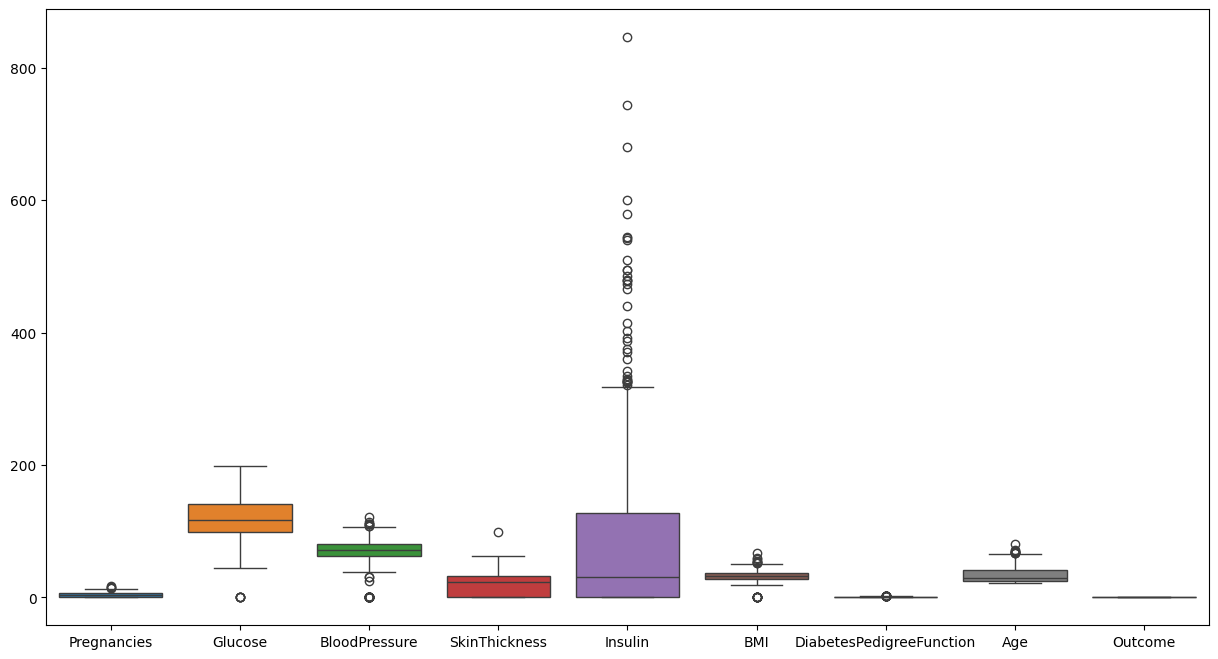

In [8]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(df)

<Axes: >

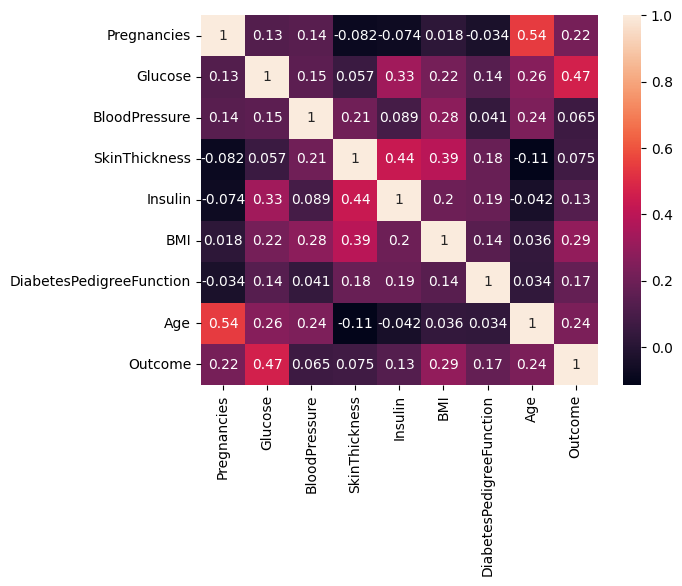

In [9]:
cor=df.corr()
sns.heatmap(cor,annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

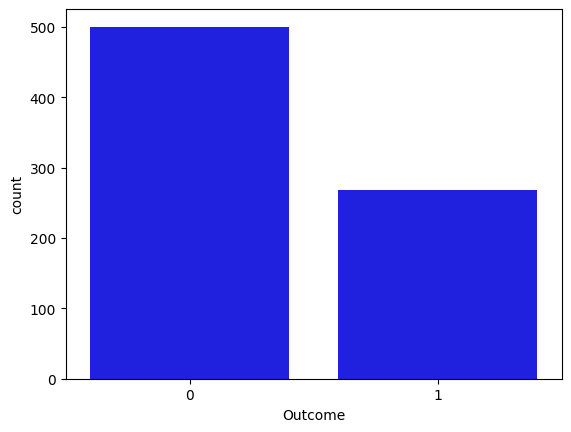

In [10]:
c=["red","blue"]
sns.countplot(df,x="Outcome",color="Blue")

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.isnull().sum().sum()

0

In [14]:
df["Glucose"].isin([0]).sum()

5

In [15]:
df["Glucose"].isin([0]).sum()/768*100

0.6510416666666667

In [16]:
df2=df.copy()

In [17]:
df2['Glucose'] = df2['Glucose'].replace(0,df['Glucose'].mean())
df2['BloodPressure'] = df2['BloodPressure'].replace(0,df['BloodPressure'].mean())
df2['SkinThickness'] = df2['SkinThickness'].replace(0,df['SkinThickness'].mean())
df2['Insulin'] = df2['Insulin'].replace(0,df['Insulin'].mean())
df2['BMI'] = df2['BMI'].replace(0,df['BMI'].mean())

In [18]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
df2['Pregnancies'].values[df2['Pregnancies'] > 0] = 1

In [20]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,1,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,1,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,1,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,1,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
print("Have Diabetes :", (df2["Outcome"].isin([1]).sum()/df2.value_counts().sum())*100)
print("Dont Have  :", (df2["Outcome"].isin([0]).sum()/df2.value_counts().sum())*100)

Have Diabetes : 34.89583333333333
Dont Have  : 65.10416666666666


In [ ]:
plt.subplots(figsize=(20,15))
sns.boxplot(data=df,x="Age",y="BMI")

In [23]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)

In [34]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44
568,4,154,72,29,126,31.3,0.338,37
148,5,147,78,0,0,33.7,0.218,65


In [35]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [36]:
model=LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
pred=model.predict(X_test)

In [39]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [45]:
cm=confusion_matrix(pred,y_test,labels=model.classes_)

In [46]:
cm

array([[121,  30],
       [ 30,  50]])

In [43]:
cr=classification_report(pred,y_test)

In [49]:
cr

'              precision    recall  f1-score   support\n\n           0       0.80      0.80      0.80       151\n           1       0.62      0.62      0.62        80\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.71      0.71       231\nweighted avg       0.74      0.74      0.74       231\n'

In [50]:
draw=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

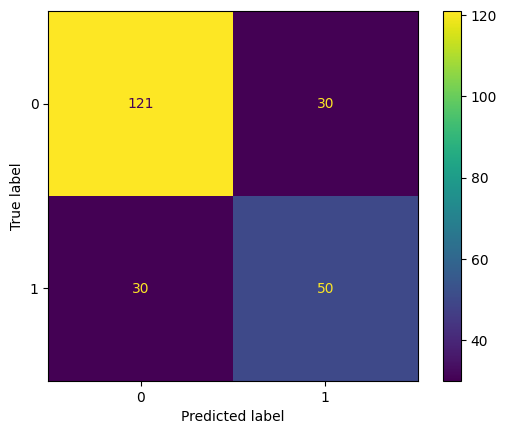

In [51]:
draw.plot()

In [52]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.74
